## Machine Learning

### 1.Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# create a path
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\Achievement 1-2\Boat_Sales'

In [4]:
# load data
df_boat = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'boat_data_sales_cleaned2.csv'), index_col = False)

### 2.Data Cleaning

In [5]:
df_boat.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days',
       'EUR Price', 'Country1', 'City1', 'Type_split', 'Fuel',
       'Price_Category'],
      dtype='object')

In [6]:
df_boat.head(20)

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country1,City1,Type_split,Fuel,Price_Category
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,new boat from stock,Unleaded,Low-priced
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,new boat from stock,Unleaded,Low-priced
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Used boat,Electric,Low-priced
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Used boat,Unleaded,Low-priced
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,new boat from stock,Unleaded,Low-priced
5,14,Fishing Boat,Italmarine power boats,"Used boat,Unleaded",1997,3.72,1.33,Aluminium,413,4590.0,Switzerland,VierwaldstÃ¤ttersee,Used boat,Unleaded,Low-priced
6,18,Pilothouse,Bnteau power boats,"Used boat,Diesel",1981,8.00,2.84,PVC,265,4000.0,France,"MARTGUES, MARTIGUES",Used boat,Diesel,Low-priced
7,20,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,69,3999.0,Germany,Bayern,new boat from stock,Unleaded,Low-priced
8,22,Sport Boat,Linder power boats,"new boat from stock,Unleaded",2020,4.31,1.64,Aluminium,90,3930.0,Germany,Nordrhein-Westfalen,new boat from stock,Unleaded,Low-priced
9,23,Sport Boat,Kammin power boats,"Used boat,Unleaded",1979,5.60,2.10,GRP,98,3900.0,Germany,"BOOTSSERVICE ENK IN TREIS KARDEN, BOOTSSERVIC...",Used boat,Unleaded,Low-priced


In [7]:
# Drop the redundant columns
df_boat = df_boat.drop(['Unnamed: 0'],axis = 1)

In [8]:
df_boat.shape

(6636, 14)

In [9]:
# Check for missing values
df_boat.isnull().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR Price                      0
Country1                       0
City1                          0
Type_split                     0
Fuel                           6
Price_Category                 0
dtype: int64

In [10]:
# Duplicates check
dups = df_boat.duplicated()

In [11]:
df_boat.shape

(6636, 14)

### Extreme value check

In [12]:
# Extreme values checks
sns.histplot(df_boat['Length'], bins=25) # Shows extreme values

<Axes: xlabel='Length', ylabel='Count'>

In [13]:
df_boat['Length'].describe()

count    6636.000000
mean       11.259043
std         5.196538
min         2.320000
25%         7.480000
50%        10.065000
75%        13.782500
max        56.000000
Name: Length, dtype: float64

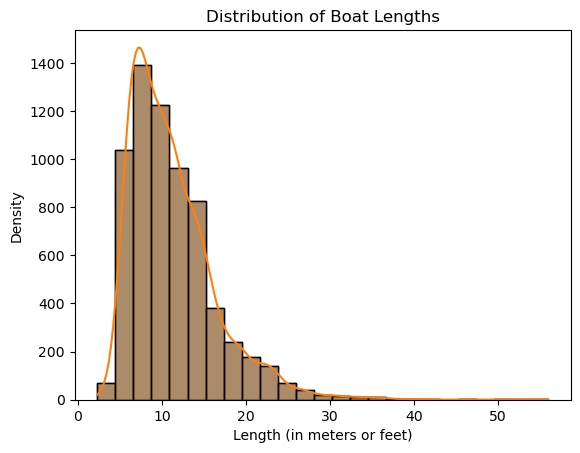

In [14]:
# Plot the histogram
sns.histplot(df_boat['Length'], bins=25, kde=True)  # kde=True adds a smooth curve
plt.title('Distribution of Boat Lengths')
plt.xlabel('Length (in meters or feet)')
plt.ylabel('Density')
plt.show()

In [15]:
df_boat['Length'].mean() # Check the mean

11.25904309825196

In [16]:
df_boat['Length'].median() # Check the median

10.065000000000001

In [17]:
df_boat['Length'].max() # Check the max

56.0

### 3.Data prep for regression analysis

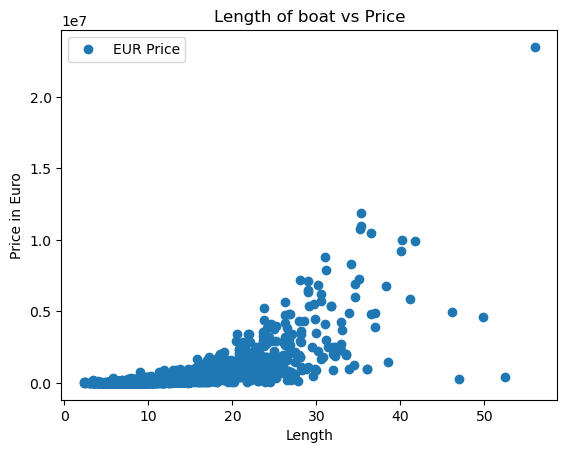

In [18]:
# Create a scatterplot using matplotlib
df_boat.plot(x = 'Length', y='EUR Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of boat vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price in Euro')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_boat['Length'].values.reshape(-1,1)
y = df_boat['EUR Price'].values.reshape(-1,1)

In [20]:
X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [21]:
y

array([[3490. ],
       [3399. ],
       [3570. ],
       ...,
       [5049. ],
       [4499. ],
       [3855.6]])

In [22]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Hypothesis

Is there a Relationship between boat length/year and price

In [23]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

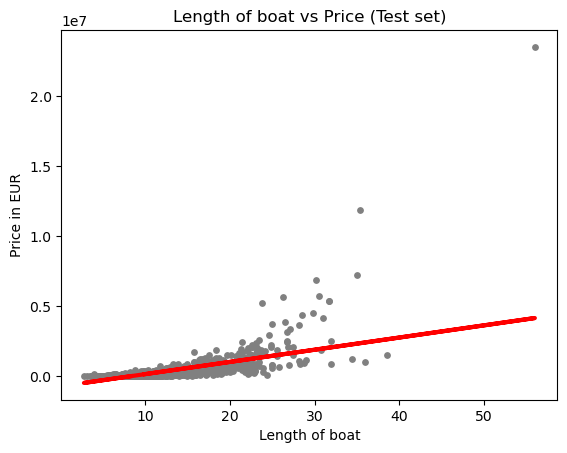

In [26]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length of boat vs Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[86981.8776124]]
Mean squared error:  383985325485.7101
R2 score:  0.3873227709944247


#### Observation - The slope is positive. This suggests that there is a positive relationship between length and price, higher the boat length, the higher the price. The MSE is high at 383985325485 , so the regression line does not represent of data. R2 score of 0.38 suggests a poor fit.

In [29]:
y_predicted

array([[  13031.17748688],
       [-167021.30917079],
       [-125270.00791684],
       ...,
       [  73918.49181556],
       [ 508827.87987756],
       [ 157421.09432346]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,39000.0,1.303118e+04
1,38000.0,-1.670213e+05
2,67900.0,-1.252700e+05
3,121900.0,-2.611067e+04
4,199000.0,3.261659e+05
5,8149.8,-3.601211e+05
6,1150000.0,1.810077e+06
7,38900.0,1.738027e+04
8,120000.0,-2.176157e+04
9,1500000.0,2.639884e+06


### Compare how the regression fits the training set

In [31]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[86981.8776124]]
Mean squared error:  261284975757.01917
R2 score:  0.4426630457695827


### Include any reflections you have on the impact of possible data bias

Although the regression model suggests a positive correlation between boat length and price, the very high Mean Squared Error and low R² score indicate that boat length alone is an insufficient predictor of price. This aligns with real-world expectations, as many additional factors—such as brand, type, condition, engine power, and onboard features—contribute significantly to a boat’s overall cost.

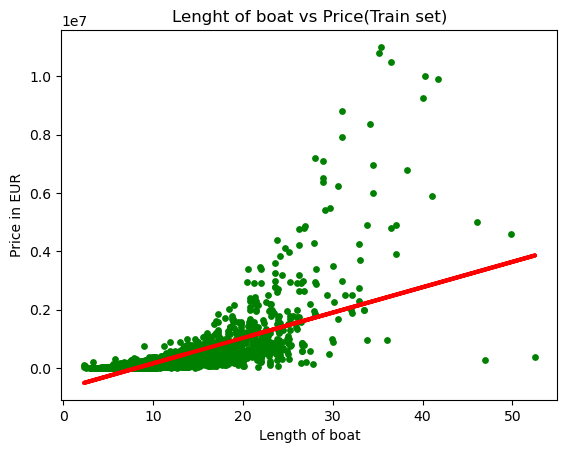

In [34]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

### Performance improvement after removing outliers

In [35]:
df_boat['EUR Price'].mean() # Check the mean

273204.36910036166

In [36]:
df_boat['EUR Price'].median() #check for median

95000.0

In [37]:
df_boat['EUR Price'].max() #check for max

23500000.0

In [38]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.
df_test = df_boat[df_boat['EUR Price'] <=20000000]

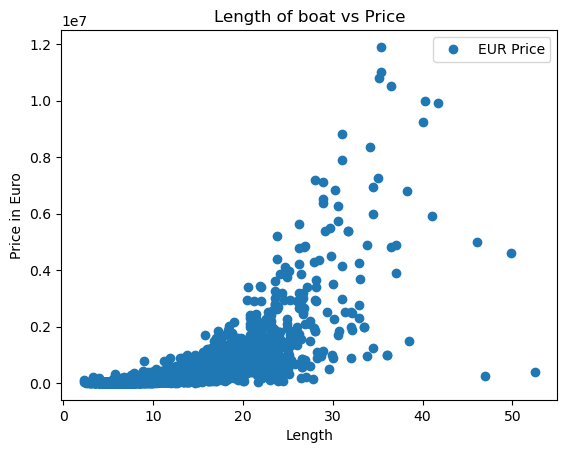

In [39]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'Length', y='EUR Price',style='o')
plt.title('Length of boat vs Price')  
plt.xlabel('Length')  
plt.ylabel('Price in Euro')  
plt.show()

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X_2 = df_test['Length'].values.reshape(-1,1)
y_2 = df_test['EUR Price'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[86141.30918302]]
Mean squared error:  211830667625.58618
R2 score:  0.43207444631859415


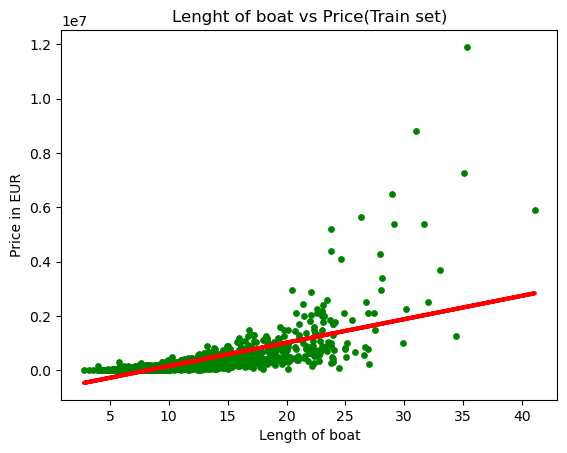

In [46]:
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Lenght of boat vs Price(Train set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

In [47]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,85000.00,151927.445703
1,82500.00,492185.616976
2,60000.00,223424.732325
3,395000.00,708400.303026
4,560000.00,815215.526413
5,119000.00,212226.362131
6,98000.00,-182300.833927
7,98793.12,-162488.332815
8,695000.00,453422.027844
9,127500.00,22715.481929


###  Extreme values check

#### Look at the distribution in Data

In [49]:
# To identify outliers
sns.histplot(df_boat['EUR Price'], bins=25) # Shows extreme values

<Axes: xlabel='EUR Price', ylabel='Count'>

In [51]:
# To identify outliers
sns.histplot(df_boat['Number of views last 7 days'], bins=25) # Shows extreme values

<Axes: xlabel='EUR Price', ylabel='Count'>

#### Look at the price of boats

In [52]:
#Look at the mean
df_boat['EUR Price'].mean()

273204.36910036166

In [53]:
#Look at the median
df_boat['EUR Price'].median()

95000.0

In [54]:
#Look at the max price
df_boat['EUR Price'].max()

23500000.0

#### Look at number of views in the last week

In [55]:
#Look at the mean
df_boat['Number of views last 7 days'].mean()

161.64798071127186

In [56]:
#Look at the median
df_boat['Number of views last 7 days'].median()

112.5

In [57]:
#Look at the max price
df_boat['Number of views last 7 days'].max()

3263

#### Data preperation

In [58]:
df_boat.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR Price', 'Country1',
       'City1', 'Type_split', 'Fuel', 'Price_Category'],
      dtype='object')

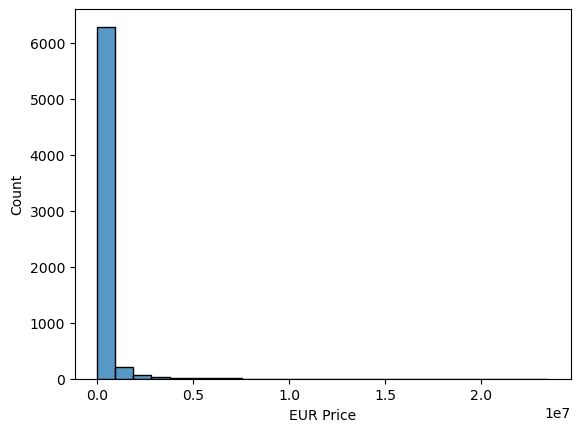

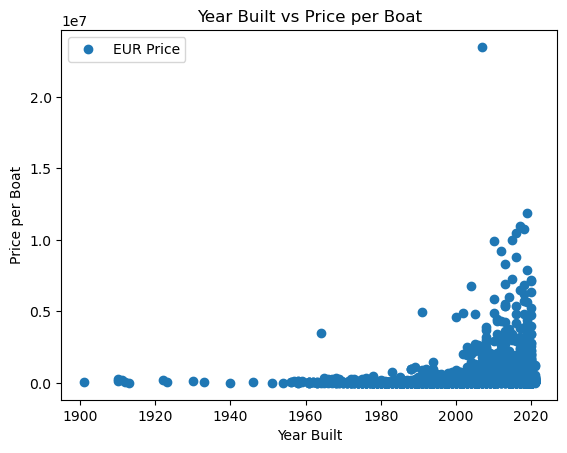

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_boat.plot(x = 'Year Built', y='EUR Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year Built vs Price per Boat')  
plt.xlabel('Year Built')  
plt.ylabel('Price per Boat')  
plt.show()

#### Hypothesis - Newer boats generally cost more

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_boat['Year Built'].values.reshape(-1,1)
y = df_boat['EUR Price'].values.reshape(-1,1)

In [61]:
X

array([[2020],
       [2019],
       [1987],
       ...,
       [1984],
       [2020],
       [2019]], dtype=int64)

In [62]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### linear regression

In [63]:
# Create a regression object.
regression = LinearRegression()

In [64]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# predict y with X test data
y_predicted = regression.predict(X_test)

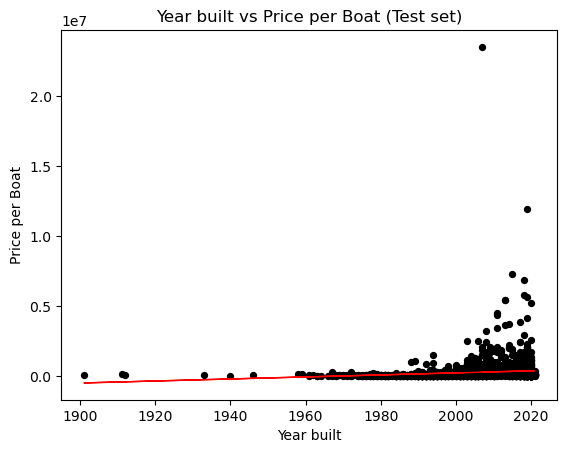

In [66]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 18)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 1)
plot_test.title('Year built vs Price per Boat (Test set)')
plot_test.xlabel('Year built')
plot_test.ylabel('Price per Boat')
plot_test.show()

#### Observation- 
The line does not fit the data well.A different machine learning model might be needed.

#### Check the model performance statistics

In [67]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [68]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7253.57142203]]
Mean squared error:  620799660982.2776
R2 score:  0.009467834279575649


#### The Mean squared error backs our view that the model is not a good fit
#As does the R2 score shows not a good fit.

#### Compare the predicted y values with the actual y values

In [69]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,39000.0,275981.008676
1,38000.0,363023.865740
2,67900.0,370277.437162
3,121900.0,363023.865740
4,199000.0,290488.151520
5,8149.8,370277.437162
6,1150000.0,246966.722987
7,38900.0,188938.151611
8,120000.0,363023.865740
9,1500000.0,181684.580189


##### There is a high variation. old boats may be expensive as well.Hypothesis might need to be checked again.